
----- DATASET INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166153 entries, 0 to 166152
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  166153 non-null  int64 
 1   Username    166153 non-null  object
 2   Artist      166153 non-null  object
 3   Track       166153 non-null  object
 4   Album       166141 non-null  object
 5   Date        166153 non-null  object
 6   Time        166153 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.9+ MB

----- DESCRIPTIVE STATS -----


,Unnamed: 0,Username,Artist,Track,Album,Date,Time
count,166153.000000,166153,166153,166153,166141,166153,166153
unique,NaN,11,22823,67241,38629,31,1440
top,NaN,Babs_05,Sophie,Cascades (Dirt Road Version),OIL OF EVERY PEARL'S UN-INSIDES,31 Jan 2021,18:49
freq,NaN,33695,1181,297,696,68884,252
mean,123210.070682,NaN,NaN,NaN,NaN,NaN,NaN
std,80248.930071,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,52401.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,117509.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,191651.000000,NaN,NaN,NaN,NaN,NaN,NaN



----- MISSING VALUES -----
Unnamed: 0     0
Username       0
Artist         0
Track          0
Album         12
Date           0
Time           0
dtype: int64

Duplicate rows before: 0
Duplicate rows after: 0

Unique users: 11
Unique tracks: 67241
Total plays: 166147


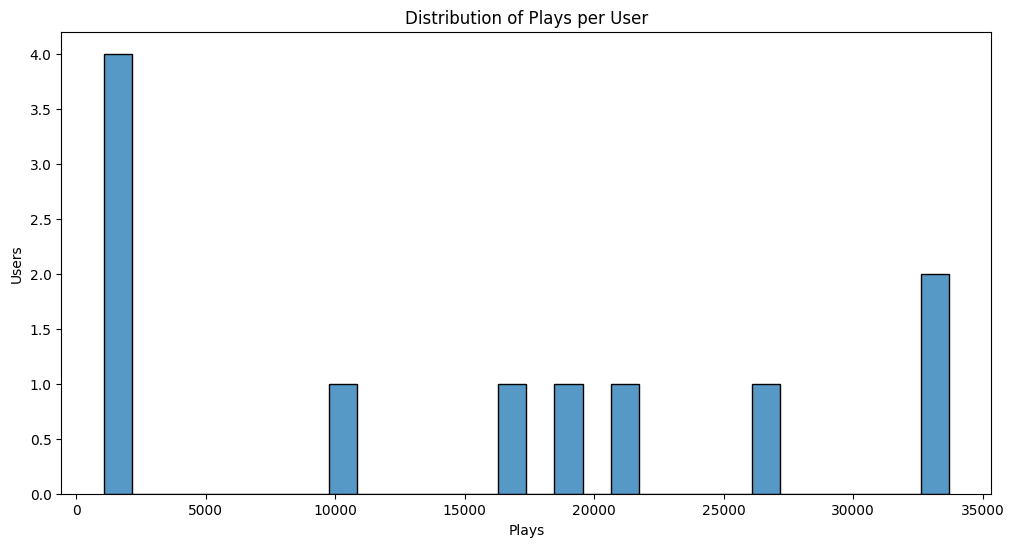

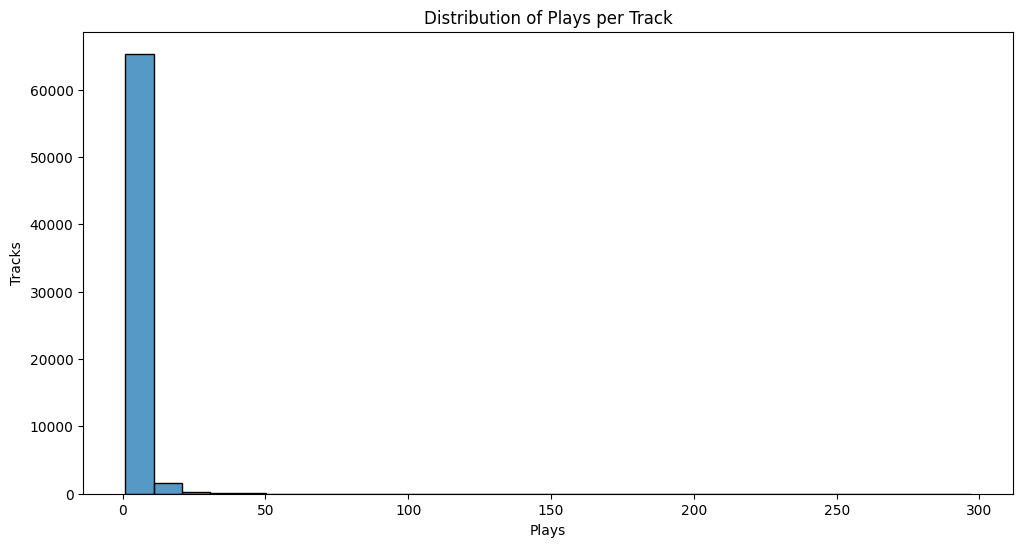

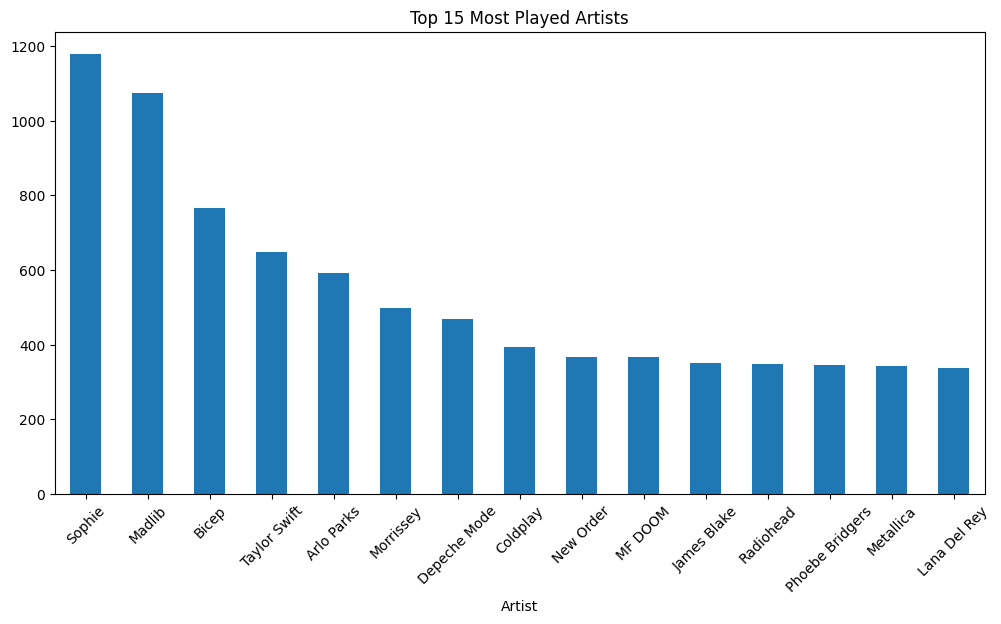

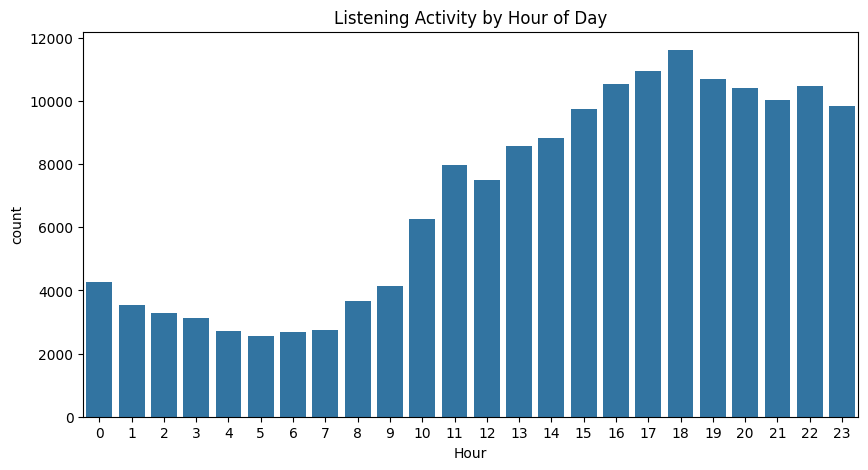


Cleaned Last.fm dataset saved!


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

lastfm_df = pd.read_csv("../data/Last.fm_data.csv")
lastfm_df.head()

print("\n----- DATASET INFO -----")
lastfm_df.info()

print("\n----- DESCRIPTIVE STATS -----")
display(lastfm_df.describe(include='all'))

print("\n----- MISSING VALUES -----")
print(lastfm_df.isna().sum())

lastfm_df.dropna(subset=["Username", "Track"], inplace=True)

text_cols = ["Artist", "Album"]
for col in text_cols:
    lastfm_df[col] = lastfm_df[col].fillna("Unknown")

lastfm_df["Time"] = lastfm_df["Time"].fillna("00:00:00")

lastfm_df["Date"] = pd.to_datetime(lastfm_df["Date"], errors="coerce")
lastfm_df.dropna(subset=["Date"], inplace=True)

lastfm_df["DateTime"] = pd.to_datetime(
    lastfm_df["Date"].astype(str) + " " + lastfm_df["Time"].astype(str),
    errors="coerce"
)
lastfm_df.dropna(subset=["DateTime"], inplace=True)

print("\nDuplicate rows before:", lastfm_df.duplicated().sum())
lastfm_df.drop_duplicates(subset=["Username", "Artist", "Track", "DateTime"], inplace=True)
print("Duplicate rows after:", lastfm_df.duplicated().sum())

print("\nUnique users:", lastfm_df["Username"].nunique())
print("Unique tracks:", lastfm_df["Track"].nunique())
print("Total plays:", len(lastfm_df))

# Plays per user
plt.figure(figsize=(12,6))
sns.histplot(lastfm_df.groupby("Username").size(), bins=30)
plt.title("Distribution of Plays per User")
plt.xlabel("Plays")
plt.ylabel("Users")
plt.show()

# Plays per track
plt.figure(figsize=(12,6))
sns.histplot(lastfm_df.groupby("Track").size(), bins=30)
plt.title("Distribution of Plays per Track")
plt.xlabel("Plays")
plt.ylabel("Tracks")
plt.show()

# Top 15 artists
plt.figure(figsize=(12,6))
lastfm_df["Artist"].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 Most Played Artists")
plt.xticks(rotation=45)
plt.show()

# Plays by hour of day
lastfm_df["Hour"] = lastfm_df["DateTime"].dt.hour
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=lastfm_df)
plt.title("Listening Activity by Hour of Day")
plt.show()

lastfm_df.to_csv("../data/lastfm_clean.csv", index=False)
print("\nCleaned Last.fm dataset saved!")